In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv('applehealthexport.csv')

C:\Users\90543\AppData\Local\Temp\ipykernel_15696\287580421.py:1: DtypeWarning: Columns (2,7,8,9,10,12,14,15,16,18,20,21,27,28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('applehealthexport.csv')


In [242]:
df.head(6)

,type,sourceName,value,unit,startDate,endDate,creationDate,dateComponents,totalEnergyBurnedUnit,date,...,appleStandHours,appleExerciseTime,totalEnergyBurned,device,time,BiologicalSex,totalDistance,activeEnergyBurnedUnit,BloodType,activeEnergyBurned
0,StepCount,iPhone,91.0,count,2023-12-31 22:14:13 +0300,2023-12-31 22:21:37 +0300,2023-12-31 22:29:12 +0300,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x282984500>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
1,DistanceWalkingRunning,iPhone,0.05982,km,2023-12-31 22:14:13 +0300,2023-12-31 22:21:37 +0300,2023-12-31 22:29:12 +0300,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x282a2b0c0>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
2,StepCount,iPhone,79.0,count,2023-12-31 22:03:49 +0300,2023-12-31 22:13:10 +0300,2023-12-31 22:16:40 +0300,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x282984460>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
3,DistanceWalkingRunning,iPhone,0.05781,km,2023-12-31 22:03:49 +0300,2023-12-31 22:13:10 +0300,2023-12-31 22:16:40 +0300,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x282a2af30>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
4,DistanceWalkingRunning,iPhone,0.06802,km,2023-12-31 20:25:06 +0300,2023-12-31 20:34:04 +0300,2023-12-31 20:38:25 +0300,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x282a2ae40>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN
5,StepCount,iPhone,90.0,count,2023-12-31 20:25:06 +0300,2023-12-31 20:34:04 +0300,2023-12-31 20:38:25 +0300,NaN,NaN,NaN,...,NaN,NaN,NaN,"<<HKDevice: 0x2829843c0>, name:iPhone, manufac...",NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
df.shape

(195028, 33)

In [244]:
df["startDate"] = df["startDate"].astype("string")
for i in range(len(df["value"])):       
    try:
        df["value"][i] = float(df["value"][i]) 
    except:
        pass
DayStepDict = {} #to hold daily steps
DayDistanceDict = {} #to hold daily distances
DayClimbDict = {} #to hold daily climbs
YearDayDict = {} #to hold how many days in year recorded(may not be 365 if there are missing days) to calculate averages
MonthDayDict = {} #to hold how many days in month recorded to calculate averages
for i in range(len(df["startDate"])):    
    if type(df["startDate"][i]) == str and type(df["value"][i]) == float:
        day = df["startDate"][i][:10]
        month = df["startDate"][i][:7]
        year = df["startDate"][i][:4]
        if year not in YearDayDict:
                YearDayDict[year] = 0
        if month not in MonthDayDict:
                MonthDayDict[month] = 0
        if df["type"][i]=="StepCount":        
            if day not in DayStepDict:
                DayStepDict[day] = df["value"][i]
                YearDayDict[year] += 1
                MonthDayDict[month] += 1
            if day in DayStepDict:
                DayStepDict[day] += df["value"][i]
        if df["type"][i]=="DistanceWalkingRunning":
            if day not in DayDistanceDict:
                DayDistanceDict[day] = df["value"][i]                
            if day in DayDistanceDict:
                DayDistanceDict[day] += df["value"][i]
        if df["type"][i]=="FlightsClimbed":
            if day not in DayClimbDict:
                DayClimbDict[day] = df["value"][i]            
            if day in DayClimbDict:
                DayClimbDict[day] += df["value"][i]
listday = [DayStepDict, DayDistanceDict, DayClimbDict]
DF=pd.DataFrame(listday).T
DF.set_axis(['StepCount', 'Distance(km)', 'FlightsClimbed'], axis='columns', inplace=True)

C:\Users\90543\AppData\Local\Temp\ipykernel_15696\3413042487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["value"][i] = float(df["value"][i])


In [245]:
DF.head()

,StepCount,Distance(km),FlightsClimbed
2023-12-31,1265.0,0.856440,NaN
2023-12-30,7413.0,5.270469,39.0
2023-12-29,7601.0,5.013730,34.0
2023-12-28,6922.0,4.613880,43.0
2023-12-27,8608.0,5.689120,29.0


In [246]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 2023-12-31 to 2018-10-19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StepCount       2645 non-null   float64
 1   Distance(km)    2645 non-null   float64
 2   FlightsClimbed  1629 non-null   float64
dtypes: float64(3)
memory usage: 82.8+ KB


In [247]:
missing_values = DF.isnull().sum() #to detect the days with no records that has to be 0
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

Missing values in the dataset:
StepCount            5
Distance(km)         5
FlightsClimbed    1021
dtype: int64


In [248]:
DF.fillna(0, inplace=True) #to fill the days which has no records with 0

In [249]:
missing_values = DF.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

Missing values in the dataset:
Series([], dtype: int64)


In [250]:
DF.head()

,StepCount,Distance(km),FlightsClimbed
2023-12-31,1265.0,0.856440,0.0
2023-12-30,7413.0,5.270469,39.0
2023-12-29,7601.0,5.013730,34.0
2023-12-28,6922.0,4.613880,43.0
2023-12-27,8608.0,5.689120,29.0


In [251]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 2023-12-31 to 2018-10-19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StepCount       2650 non-null   float64
 1   Distance(km)    2650 non-null   float64
 2   FlightsClimbed  2650 non-null   float64
dtypes: float64(3)
memory usage: 82.8+ KB


In [252]:
DF.shape

(2650, 3)

In [253]:
DF.describe()

,StepCount,Distance(km),FlightsClimbed
count,2650.000000,2650.000000,2650.000000
mean,4927.127925,3.253107,9.992830
std,5498.976053,3.649689,12.640735
min,0.000000,0.000000,0.000000
25%,761.500000,0.520837,0.000000
50%,3472.000000,2.272130,4.000000
75%,7363.750000,4.790108,18.000000
max,68633.000000,44.806088,108.000000


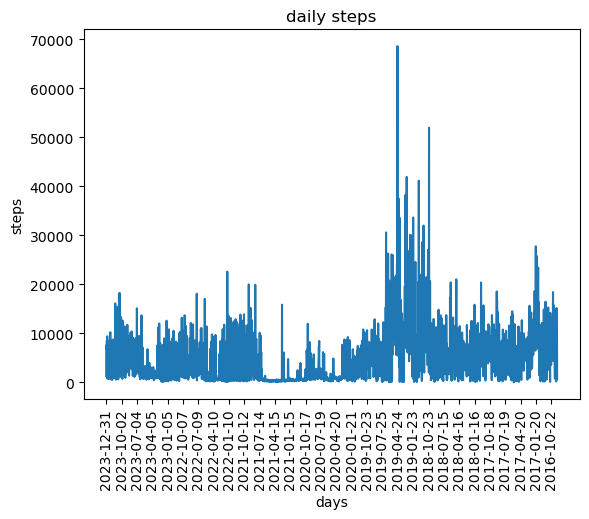

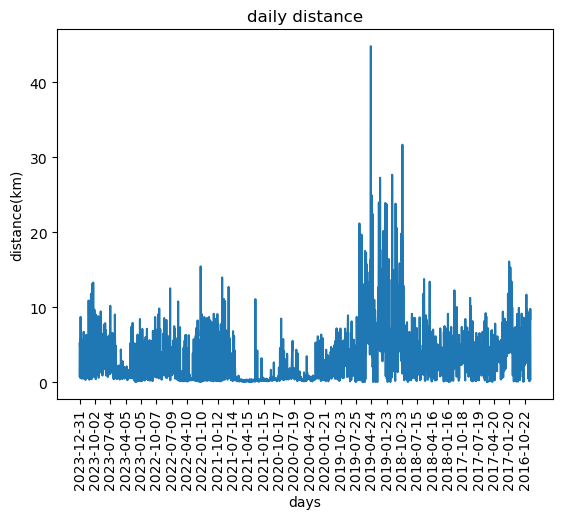

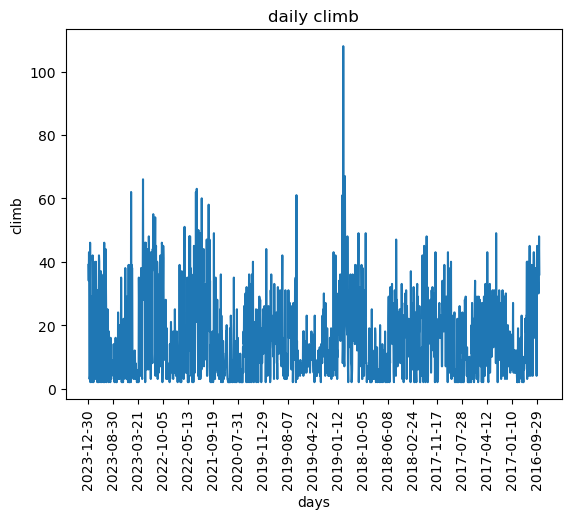

In [254]:
days1 = list(DayStepDict.keys())
dailySteps = list(DayStepDict.values())
fig1, ax1 = plt.subplots()
ax1.plot(days1, dailySteps)
ax1.set_xticks(days1[::90])
ax1.set_xticklabels(days1[::90], rotation=90)
ax1.set_xlabel('days')
ax1.set_ylabel('steps')
ax1.set_title('daily steps')
plt.show()
days2 = list(DayDistanceDict.keys())
dailyDistance = list(DayDistanceDict.values())
fig2, ax2 = plt.subplots()
ax2.plot(days2, dailyDistance)
ax2.set_xticks(days2[::90])
ax2.set_xticklabels(days2[::90], rotation=90)
ax2.set_xlabel('days')
ax2.set_ylabel('distance(km)')
ax2.set_title('daily distance')
plt.show()
days3 = list(DayClimbDict.keys())
dailyClimb = list(DayClimbDict.values())
fig3, ax3 = plt.subplots()
ax3.plot(days3, dailyClimb)
ax3.set_xticks(days3[::90])
ax3.set_xticklabels(days3[::90], rotation=90)
ax3.set_xlabel('days')
ax3.set_ylabel('climb')
ax3.set_title('daily climb')
plt.show()

In [255]:
MonthstepDict = {}
MonthdistanceDict = {}
MonthclimbDict = {}
    
for i in range(len(DF["StepCount"])):
    Month = DF.index[i][:7]
    if Month not in MonthstepDict:
        MonthstepDict[Month] = DF["StepCount"][i]             
    if Month in MonthstepDict:
        MonthstepDict[Month] += DF["StepCount"][i]
    if Month not in MonthdistanceDict:
        MonthdistanceDict[Month] = DF["Distance(km)"][i]             
    if Month in MonthdistanceDict:
        MonthdistanceDict[Month] += DF["Distance(km)"][i]
    if Month not in MonthclimbDict:
        MonthclimbDict[Month] = DF["FlightsClimbed"][i]             
    if Month in MonthclimbDict:
        MonthclimbDict[Month] += DF["FlightsClimbed"][i]
for month1, day in MonthDayDict.items():
    for month2, step in MonthstepDict.items():
        if month1 == month2:
            MonthstepDict[month2] /= day
    for month3, distance in MonthdistanceDict.items():
        if month1 == month3:
            MonthdistanceDict[month3] /= day         
    for month4, climb in MonthclimbDict.items():
        if month1 == month4:            
            MonthclimbDict[month4] /= day         
monthlist = [MonthstepDict, MonthdistanceDict, MonthclimbDict]
monthDF = pd.DataFrame(monthlist).T
monthDF.set_axis(['StepCount', 'Distance(km)', 'FlightsClimbed'], axis='columns', inplace=True) 
monthDF.head()

,StepCount,Distance(km),FlightsClimbed
2023-12,4306.774194,3.017163,14.387097
2023-11,4593.966667,3.163002,11.966667
2023-10,7449.741935,5.163181,17.612903
2023-09,5106.866667,3.621844,5.433333
2023-08,5764.290323,4.080169,6.064516


In [256]:
monthDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 2023-12 to 2016-09
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StepCount       88 non-null     float64
 1   Distance(km)    88 non-null     float64
 2   FlightsClimbed  88 non-null     float64
dtypes: float64(3)
memory usage: 2.8+ KB


In [257]:
monthDF.shape

(88, 3)

In [258]:
monthDF.describe()

,StepCount,Distance(km),FlightsClimbed
count,88.000000,88.000000,88.000000
mean,5117.379446,3.379048,10.422700
std,3580.023538,2.355745,7.395040
min,317.064516,0.220329,0.000000
25%,2481.276786,1.662077,4.622826
50%,4710.656989,3.157236,9.838710
75%,6228.091667,4.075796,14.846774
max,15489.870968,10.292017,32.615385


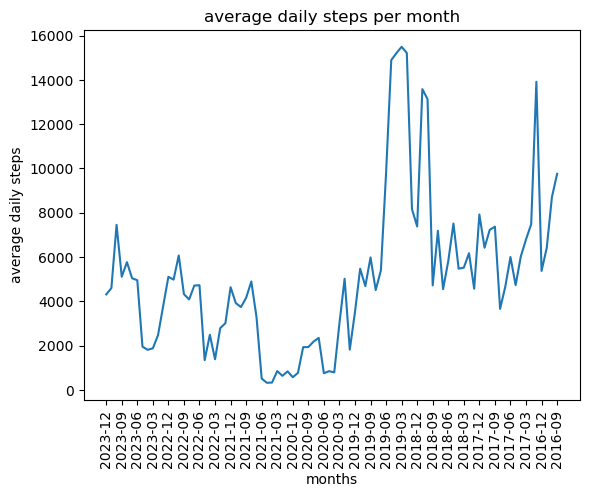

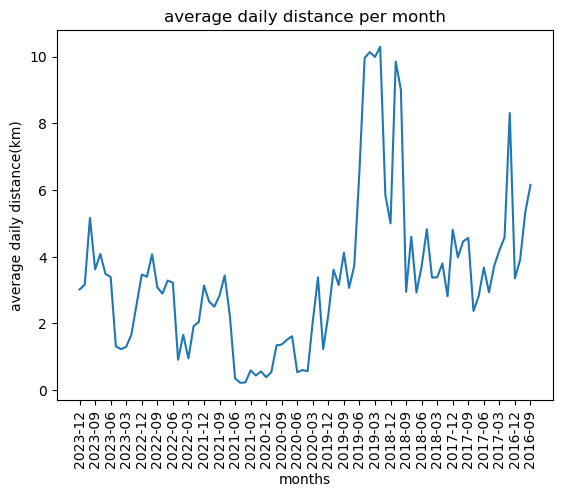

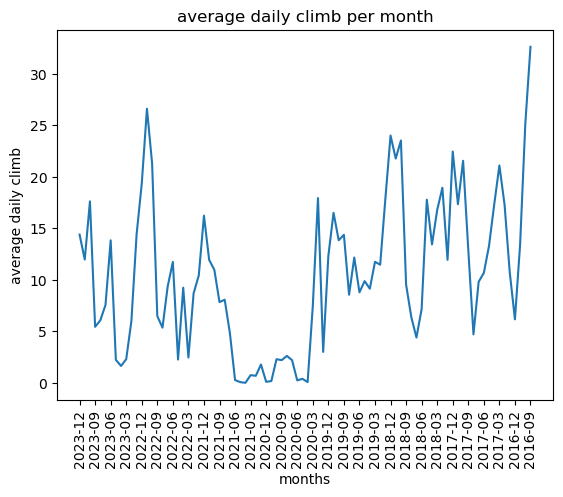

In [259]:
months1 = list(MonthstepDict.keys())
monthlySteps = list(MonthstepDict.values())
fig4, ax4 = plt.subplots()
ax4.plot(months1, monthlySteps)
ax4.set_xticks(months1[::3])
ax4.set_xticklabels(months1[::3], rotation=90)
ax4.set_xlabel('months')
ax4.set_ylabel('average daily steps')
ax4.set_title('average daily steps per month')
plt.show()
months2 = list(MonthdistanceDict.keys())
monthlyDistance = list(MonthdistanceDict.values())
fig5, ax5 = plt.subplots()
ax5.plot(months2, monthlyDistance)
ax5.set_xticks(months2[::3])
ax5.set_xticklabels(months2[::3], rotation=90)
ax5.set_xlabel('months')
ax5.set_ylabel('average daily distance(km)')
ax5.set_title('average daily distance per month')
plt.show()
months3 = list(MonthclimbDict.keys())
monthlyClimb = list(MonthclimbDict.values())
fig6, ax6 = plt.subplots()
ax6.plot(months3, monthlyClimb)
ax6.set_xticks(months3[::3])
ax6.set_xticklabels(months3[::3], rotation=90)
ax6.set_xlabel('months')
ax6.set_ylabel('average daily climb')
ax6.set_title('average daily climb per month')
plt.show()

In [260]:
YearstepDict = {}
YeardistanceDict = {}
YearclimbDict = {}
for i in range(len(DF["StepCount"])):
    Year = DF.index[i][:4]
    if Year not in YearstepDict:
        YearstepDict[Year] = DF["StepCount"][i]             
    if Year in YearstepDict:
        YearstepDict[Year] += DF["StepCount"][i]
    if Year not in YeardistanceDict:
        YeardistanceDict[Year] = DF["Distance(km)"][i]             
    if Year in YeardistanceDict:
        YeardistanceDict[Year] += DF["Distance(km)"][i]
    if Year not in YearclimbDict:
        YearclimbDict[Year] = DF["FlightsClimbed"][i]             
    if Year in YearclimbDict:
        YearclimbDict[Year] += DF["FlightsClimbed"][i]
for year1, day in YearDayDict.items():
    for year2, step in YearstepDict.items():
        if year1 == year2:
            YearstepDict[year2] /= day
    for year3, distance in YeardistanceDict.items():
        if year1 == year3:
            YeardistanceDict[year3] /= day         
    for year4, climb in YearclimbDict.items():
        if year1 == year4:            
            YearclimbDict[year4] /= day            
yearlist = [YearstepDict, YeardistanceDict, YearclimbDict]
yearDF = pd.DataFrame(yearlist).T
yearDF.set_axis(['StepCount', 'Distance(km)', 'FlightsClimbed'], axis='columns', inplace=True) 
yearDF.head(8)      

,StepCount,Distance(km),FlightsClimbed
2023,4003.906849,2.772391,8.454795
2022,3650.293151,2.508260,10.742466
2021,2314.161644,1.579584,5.282192
2020,1750.237705,1.209297,3.071038
2019,8719.595568,5.842088,11.941828
2018,6967.731638,4.579144,14.395480
2017,6701.656593,4.111995,14.590659
2016,7058.133333,4.360738,16.380952


In [261]:
yearDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2023 to 2016
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StepCount       8 non-null      float64
 1   Distance(km)    8 non-null      float64
 2   FlightsClimbed  8 non-null      float64
dtypes: float64(3)
memory usage: 256.0+ bytes


In [262]:
yearDF.shape

(8, 3)

In [263]:
yearDF.describe()

,StepCount,Distance(km),FlightsClimbed
count,8.000000,8.000000,8.000000
mean,5145.714560,3.370437,10.607426
std,2542.710531,1.607097,4.707700
min,1750.237705,1.209297,3.071038
25%,3316.260274,2.276091,7.661644
50%,5352.781721,3.442193,11.342147
75%,6990.332062,4.415339,14.444275
max,8719.595568,5.842088,16.380952


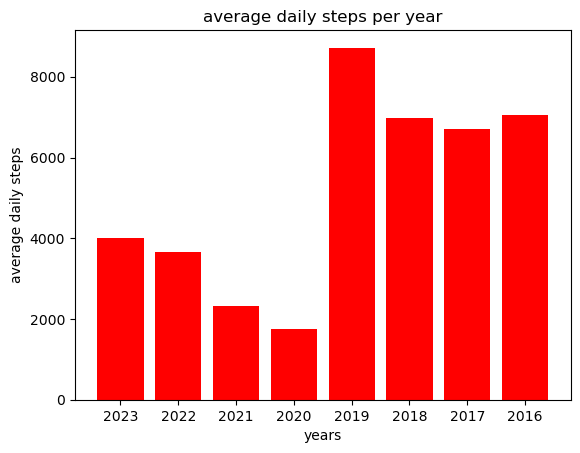

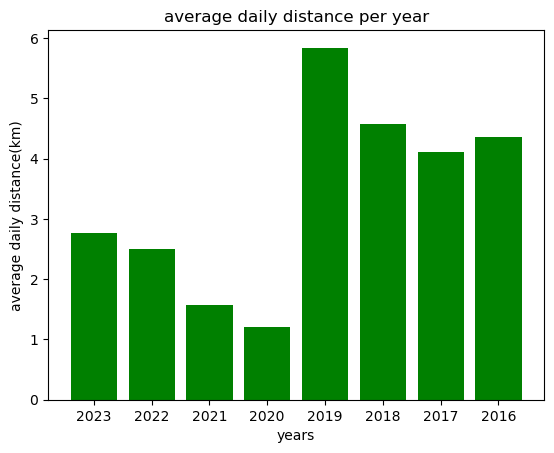

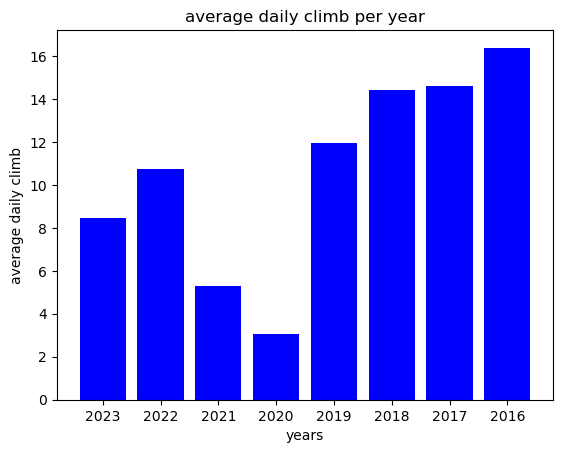

In [264]:
plt.bar(YearstepDict.keys(), YearstepDict.values(), color='r')
plt.xlabel("years")
plt.ylabel("average daily steps")
plt.title("average daily steps per year")
plt.show()
plt.bar(YeardistanceDict.keys(), YeardistanceDict.values(), color='g')
plt.xlabel("years")
plt.ylabel("average daily distance(km)")
plt.title("average daily distance per year")
plt.show()
plt.bar(YearclimbDict.keys(), YearclimbDict.values(), color='b')
plt.xlabel("years")
plt.ylabel("average daily climb")
plt.title("average daily climb per year")
plt.show()  

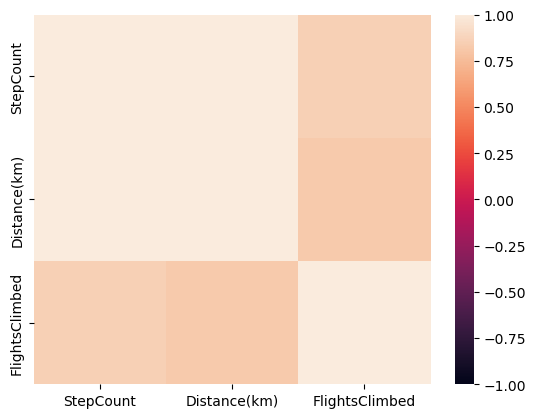

In [265]:
heatmap = sns.heatmap(yearDF.corr(), vmin=-1, vmax=1)